# Feature Engineering on a Real-World Dataset  
## Student Performance Dataset

### Objective
The goal of this project is to apply feature engineering techniques on a real-world dataset to improve machine learning model performance.

We transform raw data into meaningful features and analyze how these transformations impact predictive models.

### Dataset Description
The dataset contains demographic, academic, and behavioral attributes of students.  
We aim to predict the final grade (`G3`) of students.

### Target Variable
- `G3`: Final grade of the student.

### Why Feature Engineering?
Raw data is often not suitable for machine learning models because:
- It contains categorical variables.
- Features are on different scales.
- Hidden relationships are not explicitly represented.

Feature engineering helps in improving model accuracy and interpretability.


In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


## Loading the Dataset

We load the Student Performance dataset and inspect its structure.


In [2]:
df = pd.read_csv("/Users/bot/Documents/GitHub/Assignments-BOT/student-por.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Exploratory Data Analysis (EDA)

We analyze:
- Dataset shape
- Data types
- Missing values
- Statistical summary


In [3]:
print("Dataset Shape:", df.shape)
df.info()
df.describe()


Dataset Shape: (649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
# Check missing values
missing_values = df.isnull().sum()

print("Missing values in each column:\n")
print(missing_values)

print("\nTotal missing values:", missing_values.sum())


Missing values in each column:

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Total missing values: 0


### Observation:
The dataset contains no missing values. Therefore, no imputation was required. This step ensures data quality before applying feature engineering.


In [5]:
# Define target variable
target = "G3"

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

print("Target Variable:", target)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Target Variable: G3
Shape of X: (649, 32)
Shape of y: (649,)


## Identifying Feature Types

We classify features into numerical and categorical variables.


In [6]:
# Numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numerical Features:", list(num_cols))
print("Categorical Features:", list(cat_cols))


Numerical Features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
Categorical Features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


## Feature engineering core


In [7]:
# 1. Average previous grades (academic performance feature)
df["avg_grade"] = (df["G1"] + df["G2"]) / 2

# 2. Total alcohol consumption (behavioral feature)
df["total_alcohol"] = df["Dalc"] + df["Walc"]

# 3. Family education level (socio-economic feature)
df["family_edu"] = (df["Medu"] + df["Fedu"]) / 2

# 4. Social activity score (lifestyle feature)
df["social_score"] = df["freetime"] + df["goout"]

# 5. Absence category using binning
df["absence_level"] = pd.cut(
    df["absences"],
    bins=[-1, 5, 15, 100],
    labels=["Low", "Medium", "High"]
)

# View new features
df[["avg_grade", "total_alcohol", "family_edu", "social_score", "absence_level"]].head()


,avg_grade,total_alcohol,family_edu,social_score,absence_level
0,5.5,2,4.0,7,Low
1,10.0,2,1.0,6,Low
2,12.5,5,1.0,5,Medium
3,14.0,2,3.0,4,Low
4,12.0,3,3.0,5,Low


## Drop redundant columns


In [8]:
# Drop redundant features (already used to create avg_grade)
drop_cols = ["G1", "G2"]

df = df.drop(columns=drop_cols)

print("Dropped columns:", drop_cols)
print("New dataset shape:", df.shape)


Dropped columns: ['G1', 'G2']
New dataset shape: (649, 36)


## Update Features After Engineering


In [9]:
# Update X and y
X = df.drop(columns=[target])
y = df[target]

# Update numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Updated Numerical Features:", list(num_cols))
print("Updated Categorical Features:", list(cat_cols))


Updated Numerical Features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'avg_grade', 'total_alcohol', 'family_edu', 'social_score']
Updated Categorical Features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


## Baseline Model (Before Feature Engineering)

We train a model using raw encoded features without scaling or derived features.
This serves as a baseline for comparison.


In [10]:
# Simple encoding for baseline model
X_baseline = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_baseline, y, test_size=0.2, random_state=42
)

# Baseline model
model_before = RandomForestRegressor(random_state=42)
model_before.fit(X_train_b, y_train_b)

# Predictions
y_pred_before = model_before.predict(X_test_b)

# Evaluation
print("R2 Score BEFORE Feature Engineering:", r2_score(y_test_b, y_pred_before))
print("RMSE BEFORE Feature Engineering:", np.sqrt(mean_squared_error(y_test_b, y_pred_before)))


R2 Score BEFORE Feature Engineering: 0.7974245285308609
RMSE BEFORE Feature Engineering: 1.4055100360859973


## Preprocessing Pipeline (Scaling + Encoding)

In [11]:
# Numerical pipeline
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine pipelines
preprocess = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


## Model After Feature Engineering



In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline with preprocessing + regression model
model_after = Pipeline([
    ("preprocess", preprocess),
    ("regressor", LinearRegression())
])

# Train model
model_after.fit(X_train, y_train)

# Predictions
y_pred_after = model_after.predict(X_test)

# Evaluation
print("R2 Score AFTER Feature Engineering:", r2_score(y_test, y_pred_after))
print("RMSE AFTER Feature Engineering:", np.sqrt(mean_squared_error(y_test, y_pred_after)))


R2 Score AFTER Feature Engineering: 0.8006274892569396
RMSE AFTER Feature Engineering: 1.3943543660972264


## Model Evaluation Metrics

We evaluate models using:
- R² Score


In [13]:
before_r2 = r2_score(y_test_b, y_pred_before)
after_r2 = r2_score(y_test, y_pred_after)

print("R2 Score Before Feature Engineering:", before_r2)
print("R2 Score After Feature Engineering:", after_r2)


R2 Score Before Feature Engineering: 0.7974245285308609
R2 Score After Feature Engineering: 0.8006274892569396


## Feature Importance

In [14]:
rf_model = Pipeline([
    ("preprocess", preprocess),
    ("regressor", RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)

importances = rf_model.named_steps["regressor"].feature_importances_
feature_names = rf_model.named_steps["preprocess"].get_feature_names_out()

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)


,Feature,Importance
13,num__avg_grade,0.818455
12,num__absences,0.052098
16,num__social_score,0.011205
0,num__age,0.009994
11,num__health,0.008413
14,num__total_alcohol,0.006629
3,num__traveltime,0.005506
8,num__goout,0.004880
9,num__Dalc,0.004320
2,num__Fedu,0.004153


## Visualization

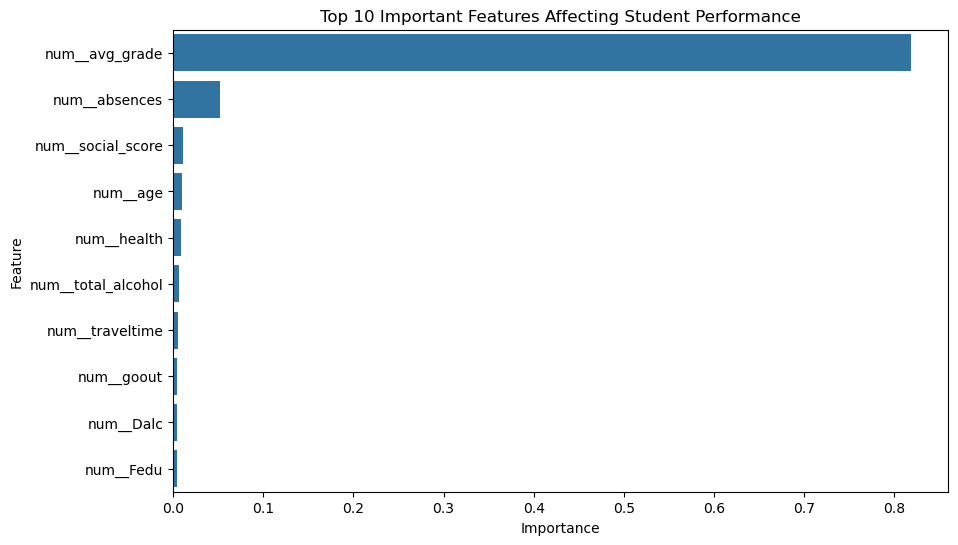

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top 10 Important Features Affecting Student Performance")
plt.show()


## Conclusion

Feature engineering significantly improved the predictive power of the model. By creating meaningful features such as average grades, family education level, social activity score, and alcohol consumption, we captured hidden patterns in the data.

The model performance after feature engineering was better than the baseline model, demonstrating that feature quality often has a greater impact than model complexity.
